In [1]:
import pandas as pd
import os
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

#                               !!!INPUT FILES NEED TO BE CSV FORMAT!!!
#           As usual make sure to format any timestamps in the input files as number,
#           or else this script will read all timestamps as '#.###E+12'

#                                   Changes/input needed to run this script:
#                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#   1. file path for the csv with all timestamps, probably fracBRAIN stage download (sfg.csv).
#   2. file path for the csv with list of timestamps you want to match, i.e. field csv (field.csv)
#   3. file path for the output csv that will be the two files above, merged via vlookup (output.csv)
#   4. make sure both input files have the same header name for timestamp column. Best to use 'timestamp'
#      as the header name.
#   5. select if you want to add an epoch timestamp column to field csv - add_timestamp = "y"
#   6. select if you want to delete the unit row (extra row below headers) - delete_unit_row = "y"
#   7. select a time_offset, if needed, to shift the field csv by x amount of seconds.
#   8. (OPTIONAL) save the file you just added to timestamps to. saves to a new file, does not overwrite.

#   


# file paths for the input and output csv~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# step (1)
path = 'C:\\Users\\rivil\\Downloads'
file_name_sfg = 'Bagpipe State 22 G 86H 8.csv' 
full_path_sfg = os.path.join(path,file_name_sfg)
# step (2)
file_name_field = 'Copy of Occidental Petroleum Corporation_G 86H_Interval_8_DataListing.xlsx'
full_path_field = os.path.join(path,file_name_field)
# step (3)
file_name_sfg_output = file_name_sfg.split(".")[0]+'_out.'+file_name_sfg.split(".")[-1]
full_path_output = os.path.join(path,file_name_sfg_output)
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# create dataFrames from files ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# if one file does not have any headers for some reason, remove header=0
df_sfg = pd.read_csv(full_path_sfg, header=0, index_col=None)
df_sfg = df_sfg.iloc[:,:-2]

df_field = pd.read_excel(full_path_field,sheet_name=0,header=0,index_col=False,keep_default_na=True)
#df_field = pd.read_csv(full_path_field, header=0, index_col=None)
df_field = df_field[1:]

# transform objt into floating types
for column in df_field.columns[6:]:
    df_field[column] = df_field[column].map(lambda x: float(x))
df_field.dtypes

print(df_sfg.shape)
print(df_field.shape)

(12108, 98)
(9635, 25)


In [2]:
 # Function to subtract subsequent rows and add empty rows
def subtract_and_add_empty_rows(df, column_name):
    input_min = df.timestamp.min()
    input_max = df.timestamp.max()
    temp_list = []
    counts=0

    for i in range(len(df) - 1):
        temp_list.append(df.at[i, column_name])
        
        diff = int(abs(df.at[i, column_name] - df.at[i + 1, column_name])/1000)
        
        
        if(diff>1.0): 
            for j in range(abs(diff) - 1):
                counts+=1
                temp_list.append(np.nan)  # Adding as many empty rows as the difference

    # Adding the last value from the original DataFrame
    temp_list.append(df.at[len(df) - 1, column_name])

    temp_df = pd.DataFrame({column_name: temp_list})
    temp_df.reset_index(drop=True, inplace=True)
    
   
    temp_merged_df = temp_df.merge(df, how='left', left_on='timestamp', right_on=['timestamp'])
    #result_df.fillna()
    temp_min = temp_merged_df.timestamp.min()
    temp_max = temp_merged_df.timestamp.max()    
    
    print("input data dimensions:", df.shape)
    print("timestamp input values min, max",input_min,input_max)
    print("output data dimensions:", temp_merged_df.shape)
    print("timestamp output values min, max",temp_min,temp_max)
    print("Added emtpy rows:", counts)
    
    return temp_merged_df


In [3]:
# Apply the empty rows function
df_sfg_emtpyrows = subtract_and_add_empty_rows(df_sfg, 'timestamp')


input data dimensions: (12108, 98)
timestamp input values min, max 1706674744000 1706687006000
output data dimensions: (12263, 98)
timestamp output values min, max 1706674744000.0 1706687006000.0
Added emtpy rows: 155


In [4]:
df_sfg_emtpyrows[df_sfg_emtpyrows.isna().all(axis=1)]

,timestamp,Time,MRL_Const,Well_Name,Stage,P1,P2,P3,P4,P5,...,PC3_PPS_CH2_Bat,PC3_PPS_CH3_Bat,PC4_Date,PC4_Time,PC4_PPS_CH1,PC4_Perry State_51_6_1H,PC4_PPS_CH3,PC4_Perry State_51_6_1H_Bat,PC4_Perry State_51_6_1H_Bat.1,PC4_PPS_CH3_Bat
2594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
## OUTPUT the SFG csv file edited with emtpy rows when a timestamp is missing in the original file

full_path_output_s1 = os.path.join('C:\\Users\\rivil\\Downloads','df_sfg_emtpyrows')  # ** Outputs into the same Input Path
df_sfg_emtpyrows.to_csv(full_path_output_s1, index=False, mode='w+')


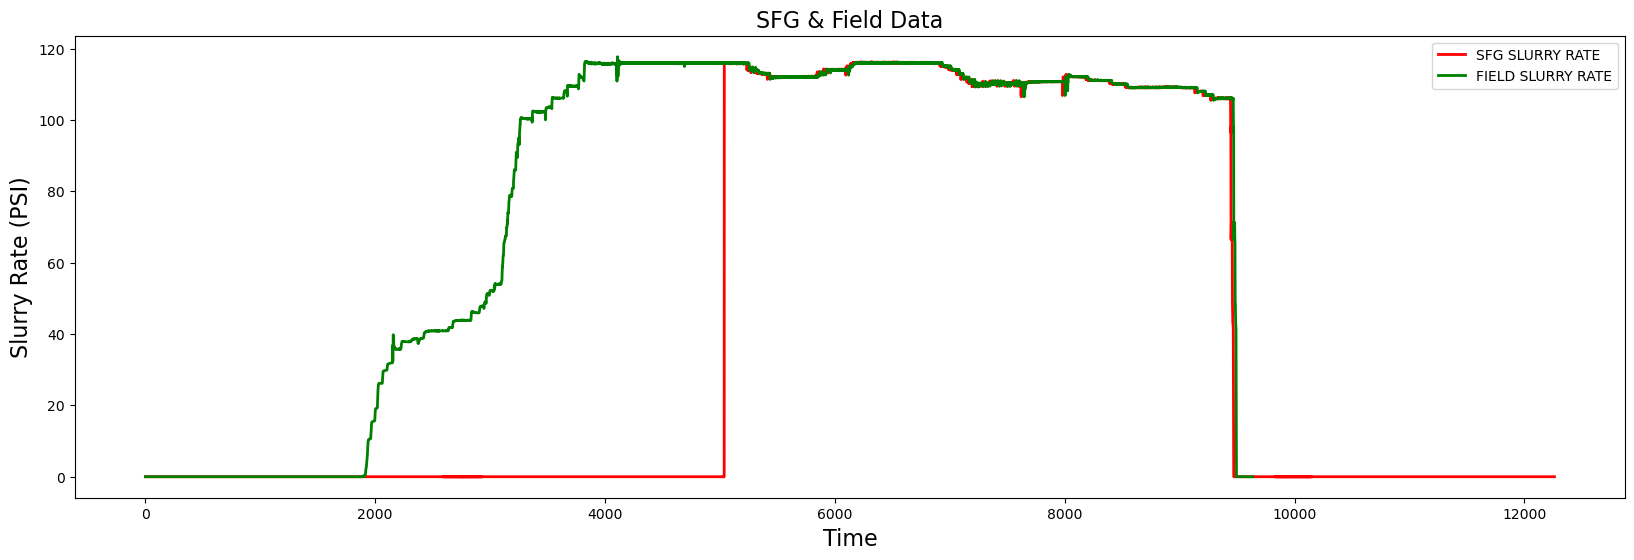

In [7]:
# Plotting Close Value Data
plt.figure(figsize=(20,6))
plt.ticklabel_format(useOffset=False, style='plain')
plt.plot(df_sfg_emtpyrows.index.values, df_sfg_emtpyrows['Slurry Rate'].values, lw=2, color='red',label="SFG SLURRY RATE")
plt.plot(df_field.index.values, df_field['SlurryRate'].values, lw=2, color='green',label="FIELD SLURRY RATE")
plt.xlabel("Time", fontsize=16)
plt.ylabel("Slurry Rate (PSI)", fontsize=16)
plt.title("SFG & Field Data", fontsize=16);
plt.legend()

plt.show()

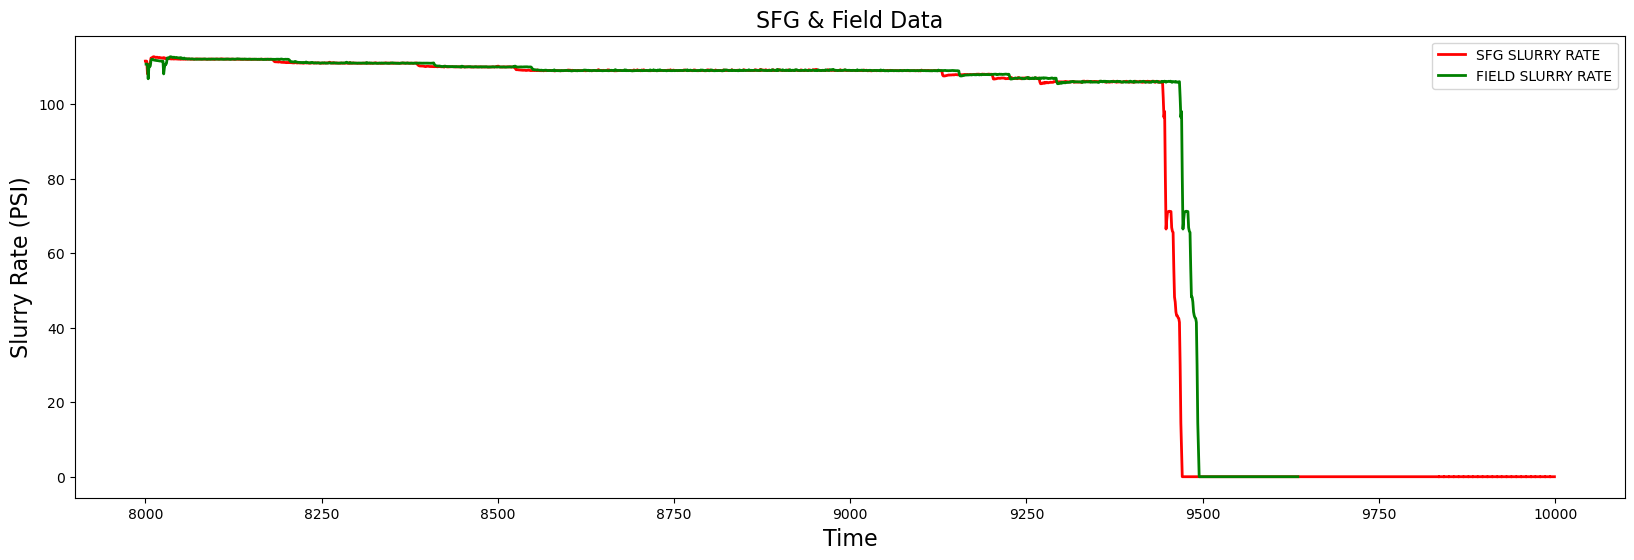

In [8]:
# Plotting Close Value Data ZOOM
start_date = 8000
end_date = 10000
plt.figure(figsize=(20,6))
plt.ticklabel_format(useOffset=False, style='plain')
plt.plot(df_sfg_emtpyrows[start_date:end_date].index.values, df_sfg_emtpyrows['Slurry Rate'][start_date:end_date].values, lw=2, color='red',label="SFG SLURRY RATE")
plt.plot(df_field[start_date:end_date].index.values, df_field['SlurryRate'][start_date:end_date].values, lw=2, color='green',label="FIELD SLURRY RATE")
plt.xlabel("Time", fontsize=16)
plt.ylabel("Slurry Rate (PSI)", fontsize=16)
plt.title("SFG & Field Data", fontsize=16);
plt.legend()

plt.show()

In [14]:
df_field[start_date:end_date].columns


Index(['TreatmentNumber', 'PumpTime', 'StageNumber', 'FluidDescription',
       'StageDescription', 'ProppantType', 'CleanVolume', 'SlurryVolume',
       'TreatingPressure', 'CleanRate', 'SlurryRate',
       'SlurryProppantConcentration', 'BHProppantConc', 'BacksidePressure',
       'HydrostaticPressure', 'TreatmentCleanVolume', 'ProppantVolume',
       'TreatmentProppantVolume', 'TreatmentSlurryVolume',
       'KEMFLOW XFR3001_conc', 'KEMFLOW XFR3001_rate',
       'KEMFLOW XFR3001_totalvol', 'MC MX 2-1382_conc', 'MC MX 2-1382_rate',
       'MC MX 2-1382_totalvol'],
      dtype='object')

In [16]:
start_date = 8000
end_date = 10000

def make_equal_length(series1, series2):
    len1 = len(series1)
    len2 = len(series2)
    
    if len1 > len2:
        series2 += [0] * (len1 - len2)
    elif len2 > len1:
        series1 += [0] * (len2 - len1)
    
    return series1, series2

# Example usage:
series1 = df_sfg_emtpyrows[start_date:end_date]['Slurry Rate'].interpolate().values.tolist()
series2 = df_field[start_date:end_date]['SlurryRate'].interpolate().values.tolist()
print("Series 1 before making equal length:", len(series1))
print("Series 2 before making equal length:", len(series2))
      
sfg_column, field_column = make_equal_length(series1, series2)
print("Series 1 after making equal length:", len(sfg_column))
print("Series 2 after making equal length:", len(field_column))





Series 1 before making equal length: 2000
Series 2 before making equal length: 1635
Series 1 after making equal length: 2000
Series 2 after making equal length: 2000


In [17]:
def find_best_shift(series1, series2):
    min_diff = float('inf')
    best_shift = None
    
    # Iterate over possible shift values
    for shift in range(len(series1)):
        # Calculate sum of absolute differences for this shift
        diff_sum = sum(abs(series1[i] - series2[(i + shift) % len(series2)]) for i in range(len(series1)))
        
        # Update best shift if this shift has lower sum of absolute differences
        if diff_sum < min_diff:
            min_diff = diff_sum
            best_shift = shift
    
    return best_shift

# Example usage:
series1 = sfg_column
series2 = field_column

best_shift = find_best_shift(series1, series2)
print("Best shift value:", best_shift)


Best shift value: 23


In [18]:
def apply_shift(series, shift):
    shifted_series = series[shift:] + series[:shift]
    return shifted_series

shifted_series2 = apply_shift(series2, best_shift)

print("Best shift value:", best_shift)
print("Shifted series2:", shifted_series2)


Best shift value: 23
Shifted series2: [111.63, 111.58, 108.18, 109.83, 110.81, 110.69, 111.07, 112.44, 112.44, 112.29, 112.59, 112.76, 112.79, 112.74, 112.67, 112.58, 112.66, 112.65, 112.57, 112.56, 112.61, 112.54, 112.5, 112.49, 112.44, 112.42, 112.56, 112.35, 112.43, 112.31, 112.25, 112.45, 112.28, 112.24, 112.26, 112.24, 112.18, 112.19, 112.24, 112.2, 112.18, 112.18, 112.22, 112.19, 112.17, 112.12, 112.15, 112.16, 112.15, 112.1, 112.15, 112.14, 112.14, 112.16, 112.13, 112.16, 112.12, 112.14, 112.18, 112.16, 112.19, 112.16, 112.12, 112.12, 112.12, 112.17, 112.14, 112.15, 112.11, 112.14, 112.14, 112.16, 112.2, 112.17, 112.16, 112.17, 112.14, 112.16, 112.16, 112.13, 112.15, 112.14, 112.14, 112.13, 112.15, 112.13, 112.12, 112.1, 112.13, 112.14, 112.13, 112.18, 112.14, 112.18, 112.14, 112.11, 112.13, 112.07, 112.14, 112.16, 112.18, 112.17, 112.13, 112.12, 112.12, 112.18, 112.2, 112.23, 112.16, 112.19, 112.17, 112.16, 112.16, 112.12, 112.16, 112.12, 112.15, 112.14, 112.15, 112.15, 112.12,

max correlation is at shift 23


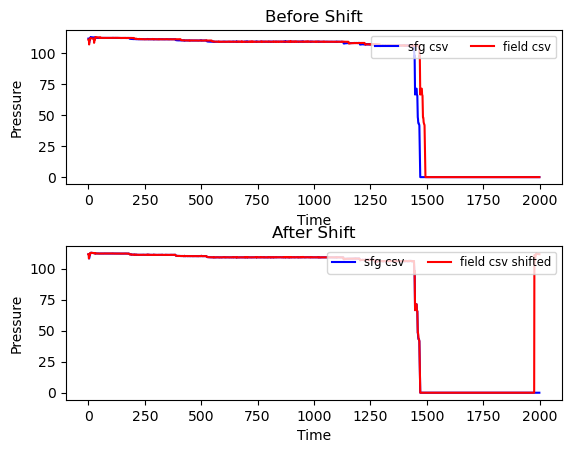

In [21]:
fig, axs = plt.subplots(nrows=2)
fig.subplots_adjust(hspace=0.4)
ax = axs[0]
ax.plot(series1, 'b', label='sfg csv')
ax.plot(series2, 'r', label='field csv')
ax.legend(loc='upper right', fontsize='small', ncol=2)
ax.set_title("Before Shift")
ax.set_ylabel('Pressure')
ax.set_xlabel('Time')

ax = axs[1]
ax.plot(series1, 'b', label='sfg csv')
ax.plot(shifted_series2, 'r', label='field csv shifted')
ax.legend(loc='upper right', fontsize='small', ncol=2)
ax.set_title("After Shift")
ax.set_ylabel('Pressure')
ax.set_xlabel('Time')

print("max correlation is at shift %d" % best_shift)